# K-means Clustering sin libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
# from kmeans import train_k_means_clustering
import random

> Preparando la data para ser trabajada por K-means y poder entonces hacer la predicciones de lugar

In [2]:
#DATOS
PATH = '/home/albertdipre/Desktop/MachineLearning/P2/frutas.jpeg'
image = cv2.imread(PATH)

alto,ancho,canales = image.shape
IMAGENMODELADA = image.reshape((alto*ancho,canales))
df = pd.DataFrame(IMAGENMODELADA,columns=['r','g','b'])
print(df)

          r    g    b
0       205  221  214
1       216  232  225
2       215  232  229
3       203  222  219
4       200  218  219
...     ...  ...  ...
469563  116  118   58
469564   98  103   42
469565  106  113   52
469566  104  112   51
469567   75   86   24

[469568 rows x 3 columns]


## Funciones de lugar para implementar k-means

In [3]:
def Buscar_centros(dim,k):
    centros = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand= random.randint(0,100)
            center.append(rand)
        centros.append(center)
    return centros

#Calcula la distancia euclideana de cada dato a cada centro
def Clustering_Euclideano(datos, centros, dimensiones, clusterinicial=False):
    for punto in datos:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centros)):
            euclidean_dist = 0
            for d in range(0, dimensiones):
                dist = abs(punto[d] - centros[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if clusterinicial:
            punto.append(nearest_center)
        else:
            punto[-1] = nearest_center
    return datos

def Centroide(data, centros, dimensiones):
    print('centers:', centros, 'dims:', dimensiones)
    new_centers = []
    for i in range(len(centros)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dimensiones):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dimensiones):
                # print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centros[i])                    
    return new_centers
    
#entrenando a la maquina para que haga lo que queremos que haga
def train_k_means_clustering(datos, k=2, interacion=5):
    dims = len(datos[0])
    centers = Buscar_centros(dims, k)
    
    clustered_data = Clustering_Euclideano(datos, centers, dims, clusterinicial=True)
# el numero de iteraciones es que tanto queremos que se revise los datos obtenidos
    for i in range(interacion):
        centers = Centroide(clustered_data, centers, dims)
        clustered_data = Clustering_Euclideano(datos, centers, dims, clusterinicial=False)
    
    # Extract labels from clustered data
    labels = [point[-1] for point in clustered_data]
    
    return centers, labels


# chequeo de si funciona o no
def prediccion(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('El punto tiene dimension:', dims, 'y los centroides contienen', center_dims, 'dimensiones')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

# TRAINED DATA

In [4]:
#KMEANS
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=97,interacion=9)

centers: [[97, 84, 94], [41, 31, 60], [39, 84, 21], [46, 78, 43], [98, 93, 53], [22, 19, 29], [31, 56, 83], [71, 58, 98], [62, 35, 83], [96, 2, 1], [48, 24, 27], [96, 97, 42], [39, 1, 23], [3, 51, 56], [80, 100, 28], [39, 14, 70], [90, 66, 48], [71, 69, 0], [21, 44, 61], [89, 9, 39], [70, 90, 19], [45, 97, 67], [23, 11, 37], [22, 93, 68], [38, 87, 62], [35, 30, 20], [33, 65, 32], [79, 89, 91], [20, 87, 65], [48, 19, 59], [97, 19, 16], [29, 98, 61], [92, 46, 51], [97, 66, 6], [98, 58, 38], [44, 25, 2], [2, 36, 24], [16, 95, 80], [72, 16, 87], [83, 39, 90], [99, 84, 35], [54, 22, 49], [12, 75, 5], [49, 91, 96], [32, 40, 41], [84, 34, 45], [96, 69, 3], [4, 45, 85], [30, 89, 45], [9, 28, 77], [21, 85, 73], [94, 43, 37], [24, 51, 73], [95, 90, 47], [86, 59, 39], [11, 23, 47], [14, 40, 25], [9, 98, 11], [83, 47, 93], [52, 12, 75], [48, 58, 93], [26, 55, 79], [56, 88, 82], [11, 5, 27], [1, 95, 62], [10, 43, 18], [31, 43, 18], [16, 60, 59], [85, 1, 97], [2, 11, 1], [81, 47, 27], [36, 42, 19], 

In [5]:
print(centros)

[[219.37509523406416, 227.80399771438246, 236.69336747650894], [42.03955174686882, 25.366512854317733, 79.50296638101516], [55.00730994152047, 89.07748538011695, 28.09502923976608], [64.15451895043732, 77.50728862973762, 47.19825072886297], [221.22783389450055, 137.14515525626638, 99.29629629629629], [19.612709685318965, 3.304640626913187, 35.24011264846333], [49.601333333333336, 23.316, 144.064], [103.4895104895105, 73.62156177156177, 231.66317016317015], [72.05065123010131, 22.114037626628075, 152.84283646888568], [78.24129114733141, 17.551294343240652, 5.391498881431767], [59.837436135624706, 16.03019043195541, 16.7598699489085], [139.13275804845668, 137.4351145038168, 85.69996681048788], [35.719862585883824, 4.802311055590256, 26.109618988132418], [26.87624466571835, 31.294452347083926, 53.39118065433855], [116.25740228977497, 117.87919463087249, 53.0746150809317], [33.071040231968105, 4.555998550199347, 78.08626313881841], [163.58011695906433, 92.6682261208577, 84.03391812865497],

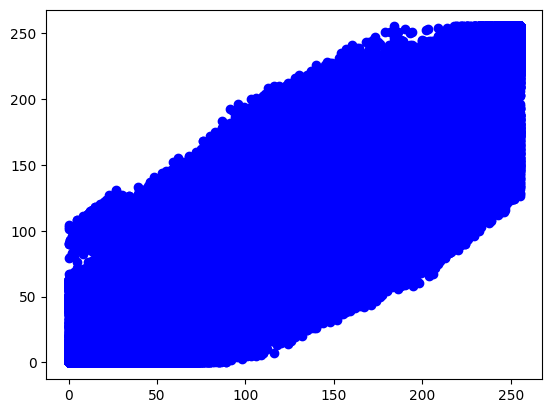

In [6]:
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx,ploty, 'bo')

In [7]:
punto = [110,3,40]
print(prediccion(punto, centros))


center: 0 dist: 318.1006596269138
center: 1 dist: 81.72739918123233
center: 2 dist: 102.83607235807027
center: 3 dist: 87.77789588032066
center: 4 dist: 184.07228054774728
center: 5 dist: 90.5130464846992
center: 6 dist: 122.02481258789587
center: 7 dist: 204.36379879449547
center: 8 dist: 120.57779749520739
center: 9 dist: 49.174221953439556
center: 10 dist: 56.7994042304336
center: 11 dist: 144.94828239632213
center: 12 dist: 75.58921764415834
center: 13 dist: 88.82262354722502
center: 14 dist: 115.79002548565438
center: 15 dist: 85.85481595320678
center: 16 dist: 113.35874758821821
center: 17 dist: 47.922032113509545
center: 18 dist: 87.78880607854552
center: 19 dist: 45.61270261393981
center: 20 dist: 102.36771751582559
center: 21 dist: 148.51512757966114
center: 22 dist: 84.75704875373391
center: 23 dist: 115.55267846929765
center: 24 dist: 83.38563092967598
center: 25 dist: 79.49427168534471
center: 26 dist: 88.37950865224819
center: 27 dist: 182.77061564955446
center: 28 dist: 1

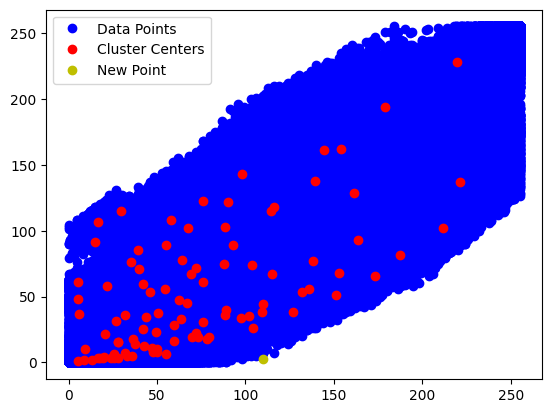

In [8]:
# cENTROS
center_x = [center[0] for center in centros]
center_y = [center[1] for center in centros]


plt.plot(plotx, ploty, 'bo', label='Data Points')
plt.plot(center_x, center_y, 'ro', label='Cluster Centers')
plt.plot(punto[0], punto[1], 'yo', label='New Point')
plt.legend()
plt.show()


In [9]:
clusters = Clustering_Euclideano(X,centros,2,clusterinicial=False)


In [10]:
df_clusters = pd.DataFrame(clusters)
print(df_clusters.head())

     0    1    2  3
0  205  221  214  0
1  216  232  225  0
2  215  232  229  0
3  203  222  219  0
4  200  218  219  0


In [11]:
a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

imagen1 = centros[labels]
imagenrec = imagen1.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=97",imagenrec.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/albertdipre/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [12]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=3,interacion=9)

centers: [[4, 61, 2], [51, 83, 62], [90, 17, 51]] dims: 3
centers: [[13.514310294179362, 6.8055520584162155, 18.712723991774727], [172.91807329860654, 170.8413006038397, 182.58235620194566], [60.88450824132896, 18.96088130223235, 82.60991222540129]] dims: 3
centers: [[35.11914311759344, 11.857830446672743, 28.433217866909754], [191.30796801621946, 191.04958934149823, 204.0318286198978], [71.86013091520537, 35.892367283209225, 100.90726038914245]] dims: 3
centers: [[44.94378453217396, 16.42911765847599, 36.67597660546304], [196.37119414505847, 200.00805054461247, 212.76386403270533], [82.19868386304753, 47.79822564183089, 117.70398338412785]] dims: 3
centers: [[49.31501292459642, 19.070404603250715, 42.24316429394225], [199.00324231156324, 204.16879305253389, 216.52853294441667], [88.70177577741407, 56.290081833060555, 129.11684124386252]] dims: 3
centers: [[51.60854185772305, 20.433799594876497, 46.17848108919772], [200.50959944879983, 206.39782002818072, 218.20412406969453], [93.29320

In [13]:
a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=3",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=5,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=5",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[63, 51, 24], [86, 42, 30], [76, 31, 27], [24, 29, 6], [32, 75, 82]] dims: 3
centers: [[52.96176331173961, 68.43893190077421, 40.28250908516353], [137.6526700136924, 61.076742518093496, 63.2261361413575], [70.87044272745968, 18.505067716442905, 73.19471782367285], [17.9351568674616, 5.347868916302991, 32.37710044328374], [142.75463109831082, 138.79854143126514, 177.93508085931512]] dims: 3
centers: [[62.51211533801793, 75.36200629997577, 51.35503998061546], [150.97193630685317, 74.26506554059998, 52.03174100466262], [59.06009853276537, 20.8891398821049, 109.44899100727163], [19.42401478047165, 4.78570059087027, 49.09097484879647], [188.18662175423705, 192.3488740948996, 210.90388032782536]] dims: 3
centers: [[76.31749475157453, 71.738733379986, 49.30430370888733], [154.38872379467693, 83.9185950211916, 59.51752975755509], [58.571577275556415, 24.582072414311163, 137.32273088232137], [22.810344245126853, 5.933802912063782, 40.96395392047566], [196.4060792410781, 202.6331182180

In [15]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=7,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("k=7",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[21, 58, 38], [63, 76, 33], [57, 3, 9], [60, 48, 46], [75, 92, 43], [78, 75, 74], [3, 88, 35]] dims: 3
centers: [[18.334681652565923, 7.440962144136355, 74.9547026492929], [150.28916922219125, 67.11290772233063, 28.051435740172845], [36.11192222450705, 6.698859871592752, 43.97752873169283], [68.29702074735711, 28.066764656000906, 91.60870220664444], [154.74061351172182, 98.63165190140421, 48.58349906587115], [172.44990989673607, 167.67274666574914, 191.71160934321387], [19.324360699865412, 99.06460296096904, 29.296096904441452]] dims: 3
centers: [[25.70091881030172, 5.465602135198564, 99.21569800438698], [141.84532879208868, 54.09028711421828, 30.17540557497535], [25.45387877509899, 7.372156228766898, 27.27135024952555], [72.1494317174005, 35.50049801476307, 126.67708176993082], [155.60366810513926, 110.25101346933438, 75.31361972015169], [193.67031741492707, 199.32912210466114, 215.75334286531313], [44.172757962718336, 87.13606340819022, 37.103331865551155]] dims: 3
centers:

In [16]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=9,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=9",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[95, 66, 41], [98, 65, 74], [27, 49, 53], [16, 82, 26], [45, 72, 22], [23, 86, 56], [35, 84, 16], [39, 77, 66], [40, 18, 36]] dims: 3
centers: [[142.82421927057882, 62.5700546399538, 29.299786770912], [173.1644179922499, 167.60778436703848, 191.18232032370636], [40.52744014732965, 37.58195211786372, 106.9598526703499], [9.518001074691027, 63.72058033315422, 20.877485222998388], [54.21748681898067, 74.72671353251319, 29.47671353251318], [52.74766355140187, 108.64602803738318, 50.33528037383178], [35.671159029649594, 88.5121293800539, 23.940700808625337], [57.66253369272237, 83.0366576819407, 99.24420485175202], [29.878203726507923, 7.0605471222566205, 69.08219493388268]] dims: 3
centers: [[155.2610529698893, 66.69258582246952, 39.80732378522789], [194.8101322214924, 199.76427449524516, 214.16957477796498], [61.1227710195906, 21.91805494487599, 141.3099646620092], [8.588660166124955, 8.376549897676659, 15.184583283174833], [68.47876555223466, 37.42079655244318, 25.0119552373670

qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4764, resource id: 10485952, major code: 18 (ChangeProperty), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4765, resource id: 10485952, major code: 25 (SendEvent), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4774, resource id: 10495048, major code: 18 (ChangeProperty), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4775, resource id: 10495048, major code: 25 (SendEvent), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4784, resource id: 10495051, major code: 18 (ChangeProperty), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4785, resource id: 10495051, major code: 25 (SendEvent), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB error: 3 (BadWindow), sequence: 4794, resource id: 10495054, major code: 18 (ChangeProperty), minor code: 0
qt.qpa.xcb: QXcbConnection: XCB err

In [17]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=11,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=11",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[99, 35, 90], [28, 15, 79], [5, 60, 65], [58, 10, 52], [15, 75, 64], [40, 56, 21], [38, 38, 10], [49, 10, 86], [91, 68, 38], [22, 17, 10], [77, 60, 77]] dims: 3
centers: [[180.36793008782143, 177.49301692706462, 201.22878607122496], [23.039437622352732, 6.359369994660971, 95.51064246307172], [17.981693363844393, 54.924485125858126, 58.11212814645309], [40.72370766488414, 9.640132416603004, 46.29829386299974], [34.51650770359501, 95.2516507703595, 56.784299339691856], [38.61538461538461, 65.57028223574986, 31.165467625899282], [83.02781371280724, 30.501293661060803, 11.360392410521778], [51.157784153807924, 13.098411766034838, 124.89298059327203], [147.79406470872294, 71.49901224812326, 35.54572193687168], [18.47112482506281, 4.493466201291584, 20.743537862309676], [94.76704706215222, 87.07549750070734, 113.01971140243327]] dims: 3
centers: [[198.95566881783515, 205.27931578175418, 218.033275887357], [25.78106984542594, 4.928363076781736, 94.16132662670249], [43.1431630468033,

In [18]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=13,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("k=13",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[43, 9, 79], [49, 28, 22], [10, 71, 52], [56, 52, 45], [25, 39, 11], [5, 4, 88], [38, 24, 43], [19, 24, 11], [79, 42, 35], [82, 28, 30], [42, 88, 13], [78, 8, 86], [18, 52, 71]] dims: 3
centers: [[39.41913483342055, 10.473853130995987, 107.43150183150183], [51.51085058618109, 13.922175106011474, 13.697181341980544], [17.03869407496977, 70.70133010882708, 36.26481257557437], [60.228094415659186, 71.5483016695452, 81.77651122625215], [15.253299811439346, 44.879321181646766, 17.32872407291012], [16.27853361416292, 3.151420276655092, 93.78650310240792], [27.495105998051677, 8.517326158556385, 44.54209769448439], [13.183453494182311, 3.5811740071858567, 17.688819092488163], [151.10383260382193, 75.69253763211273, 40.089206789793955], [97.30543692509856, 26.545006570302235, 14.073258869908015], [49.61777583187391, 95.69658493870404, 33.44045534150613], [170.16339133136555, 164.6437004815908, 194.348816736575], [34.48032069970846, 49.85422740524781, 126.70262390670554]] dims: 3
cent

In [19]:
X = df.values.tolist()

centros,labels = train_k_means_clustering(X,k=15,interacion=9)

a = np.asarray(image,dtype=np.float32)/255
h,w,c = a.shape
pixeles = w*h
imagefunciona = a.reshape(w*h,c)
colors = np.unique(imagefunciona,axis=0,return_counts=True)
num_colors = colors[0].shape[0]

centros = np.array(centros)
labels = np.array(labels)

a2k = centros[labels]
a3k = a2k.reshape(h,w,c)


imagen_color_map = cv2.imshow("K=15",a3k.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

centers: [[14, 40, 99], [36, 98, 69], [98, 80, 69], [63, 0, 3], [92, 92, 47], [31, 33, 23], [6, 14, 44], [14, 98, 0], [13, 32, 7], [56, 7, 29], [26, 3, 39], [29, 43, 65], [29, 77, 29], [29, 80, 77], [17, 48, 76]] dims: 3
centers: [[43.962751124912856, 15.372187717852842, 139.85981367640534], [59.919534658264666, 112.30974309258362, 79.00824042656326], [178.84293450161908, 175.37176068283037, 193.88271789708563], [82.86764801245056, 20.359898839245187, 5.551520653654108], [151.88810034181103, 74.59683679972191, 35.131568275302705], [69.09567617295308, 32.79642528584571, 21.47378104875805], [7.972083657498513, 3.2271749576678412, 38.90430643906458], [11.33201581027668, 100.97233201581028, 22.83399209486166], [8.553277102839898, 7.2382573705795865, 8.582449895535092], [60.72961532356209, 12.27641674162654, 69.98714217683475], [23.3302835579131, 3.242528346891187, 49.271311344096546], [44.29654393069027, 26.849797532724363, 70.00856954515491], [37.584466019417476, 77.02446601941747, 31.396